# 어린이 보험 분석 인사이트

1. 나이대 별로 구분했을 때 가장 어린 것이 13살이다. 즉 0세-10세 사이의 미취학 아동은 아예 원본 데이터 상에 없다.
2. 10대가 2만명 정도로 충분하여 연령.성별 분석은 월납/10대 피보험자 2만명 데이터 위주로 진행함
3. 남자 10대의 납입기간은 10년과 20년, 여자 10대의 납입기간은 20년으로 많다. Default 검색은 이렇게 해야 할 듯 하다. (남자아이는 보험상품 더 잘 나오는 쪽으로.)

| 성별 | 납입기간               | 보험기간               |
| ---- | ---------------------- | ---------------------- |
| 남   | 10년(20년과 거의 비슷) | 20년(30년과 거의 비슷) |
| 여   | 20년                   | 30년                   |

4. 월납/10대가 아닌 전체 최다 납입기간은 30년, 보장기간은 30년이다.
5. 보험료는 **2000 - 4000원 후반대**, 여자 10대가 좀 더 낮긴 하나 유의미하진 않다.(3000원대가 가장 많음)
6. 실제 보험은 8천원대가 많기 때문에, 같은 납입기간.보험기간 내에 4천원대에 맞는 보험을 2-3개 추가로 찾아보고 그걸로 csv를 우선 작성 예정.
7. 전체 담보그룹코드는 5-4-6-3-7 순이었으나, **10대/월납의 담보그룹코드**는 6-5-4-3-7 (A6:입원일당,A5:수술, A4:진단, A3:장해, A7:통원) 순이었음.
8. 보험담보그룹 선호는 남자의 경우 입원일당이 가장 많고 그 이후 수술 / 여자의 경우 수술이 가장 많고 그 이후 입원일당 => 둘의 차이가 몇십명 수준이라 **남녀 둘다 '입원일당, 수술'  가장 선호하고 이후 진단-장해-통원 순으로 선호한다고 볼 수 있음.**
9. **13, 14, 17세는 입원일당**을  / **15,16, 18, 19세는 수술**관련 담보그룹코드를 우선시한다. 
10. 입원일당(A6) 에서는 질병입원일당, 상해입원일당, 특정상해입원일당, 암입원일당, 특정질병입원일당 순으로 선호.
11. 수술(A5) 에서는 질병수술, 특정질병수술, 상해종수술, 화상수술, 질병종수술, 기타수술 순으로 선호
12. 진단(A4)에서는 암진단, 골절진단, 특정질병진단, 소액암진단, 급성심근경색, 고액암진단 순으로 선호

13. 장해(A3)에서는 상해후유장해, 교통상해후유장해, 특정교통상해후유장해, 상해80%이상후유장해 순으로 선호
14. 통원(A7)에서는 특정질병통원, 상해통원, 암통원, 치과통원, 기타통원 순으로 많다.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import csv

In [107]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [4]:
df= pd.read_csv('preprocessed_5.csv', encoding='UTF-8')
df

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,...,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,INSU_DAYS,INSU_YEAR,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM
0,233370,1,1997,2,1,26,8,6900284,344059,33,...,70,2,20,1,28490,79,A5,A5309,1,4500
1,233370,1,1997,2,1,26,8,6900284,344059,33,...,70,2,20,1,28490,79,A4,A4102,1,18000
2,233370,1,1997,2,1,26,8,6900284,344059,33,...,70,2,20,1,28490,79,A5,A5107,1,1800
3,233370,1,1997,2,1,26,8,6900284,344059,33,...,70,2,20,1,28490,79,A6,A6109,1,100
4,233370,1,1997,2,1,26,8,6900284,344059,33,...,70,2,20,1,28490,79,A4,A4200,1,18000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407436,541575,1,1978,1,1,45,6,7829020,5507225,26,...,79,2,30,1,19358,54,A6,A6112,1,240
407437,541575,1,1978,1,1,45,6,7829020,5507225,26,...,79,2,30,1,19358,54,A1,A1300,2,80000
407438,541575,1,1978,1,1,45,6,7829020,5507225,26,...,79,2,30,1,19358,54,A5,A5100,2,240
407439,541575,1,1978,1,1,45,6,7829020,5507225,26,...,79,2,30,1,19358,54,A5,A5107,1,4000


In [191]:
df_copy = df.copy()
df_copy = df_copy[df_copy.INS_GBN_CD == 7]
df_copy

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,INS_GBN_CD,INS_CT_STAT_CD,CT_ST_DT,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,INSU_DAYS,INSU_YEAR,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM
32,1712158,1,2004,2,1,19,8,1485535,9929934,31,7,2,2007-05-01,2037-05-01,120,2,5,6,10958,31,A5,A5200,2,10000
33,1712158,1,2004,2,1,19,8,1485535,9929934,31,7,2,2007-05-01,2037-05-01,120,2,5,6,10958,31,A4,A4209,1,91000
34,1712158,1,2004,2,1,19,8,1485535,9929934,31,7,2,2007-05-01,2037-05-01,120,2,5,6,10958,31,A5,A5199,1,1300
35,1712158,1,2004,2,1,19,8,1485535,9929934,31,7,2,2007-05-01,2037-05-01,120,2,5,6,10958,31,A7,A7300,1,100
36,1712158,1,2004,2,1,19,8,1485535,9929934,31,7,2,2007-05-01,2037-05-01,120,2,5,6,10958,31,A5,A5300,1,13000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407279,900230,1,1991,2,1,32,6,5961001,9892012,11,7,2,2019-12-01,2089-12-01,46,2,20,3,25568,71,A3,A3300,1,10000
407280,900230,1,1991,2,1,32,6,5961001,9892012,11,7,2,2019-12-01,2089-12-01,46,2,20,3,25568,71,A4,A4302,1,650
407281,900230,1,1991,2,1,32,6,5961001,9892012,11,7,2,2019-12-01,2089-12-01,46,2,20,3,25568,71,A5,A5200,1,13000
407282,900230,1,1991,2,1,32,6,5961001,9892012,11,7,2,2019-12-01,2089-12-01,46,2,20,3,25568,71,A4,A4101,1,13000


# 1. 담보(코드, 그룹코드) 구성

<function matplotlib.pyplot.show(close=None, block=None)>

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


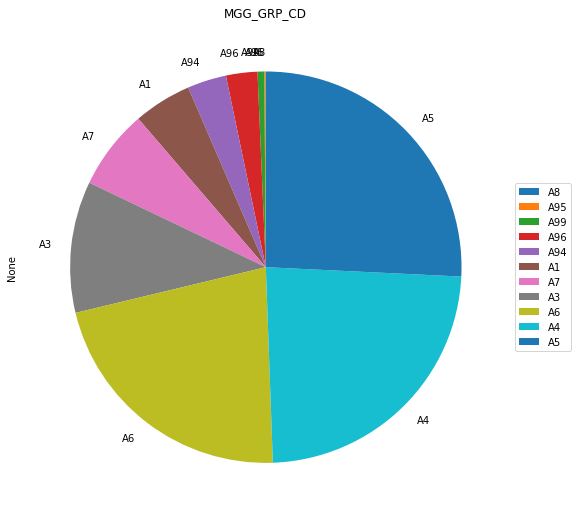

In [8]:
# 전체 그룹코드 구성
# A5:수술, A4:진단, A6:입원일당, A3:장해, A7:통원
MGG_GRP_CD = df_copy.groupby('MGG_GRP_CD').size().sort_values()
MGG_GRP_CD.plot(kind='pie', figsize=(12,9), startangle=90)
plt.title('MGG_GRP_CD')
plt.legend(MGG_GRP_CD.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show

#### A5 담보코드 구성

<function matplotlib.pyplot.show(close=None, block=None)>

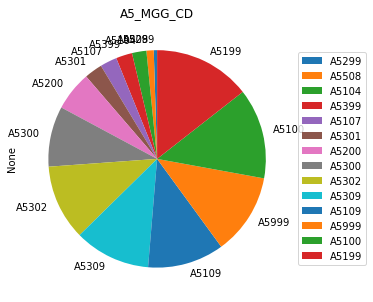

In [14]:
# 그룹코드별 담보 구성(A5)
MGG_GRP_CD_A5 = df_copy[df_copy.MGG_GRP_CD == 'A5']
A5_MGG_CD = MGG_GRP_CD_A5.groupby('MGG_CD').size().sort_values()
# A5_MGG_CD.head()
A5_MGG_CD.plot(kind='pie', figsize=(10,5), startangle=90)
plt.title('A5_MGG_CD')
plt.legend(A5_MGG_CD.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show

#### A4 담보코드 구성

<function matplotlib.pyplot.show(close=None, block=None)>

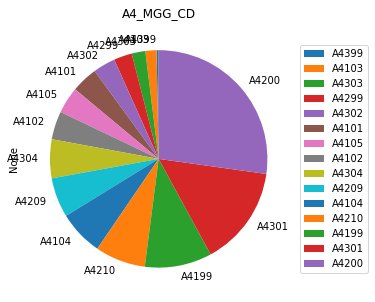

In [13]:
# 그룹코드별 담보 구성(A4)
MGG_GRP_CD_A4 = df_copy[df_copy.MGG_GRP_CD == 'A4']
A4_MGG_CD = MGG_GRP_CD_A4.groupby('MGG_CD').size().sort_values()
# A4_MGG_CD.head()
A4_MGG_CD.plot(kind='pie', figsize=(10,5),startangle=90)
plt.title('A4_MGG_CD')
plt.legend(A4_MGG_CD.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show

#### A6 담보코드 구성

<function matplotlib.pyplot.show(close=None, block=None)>

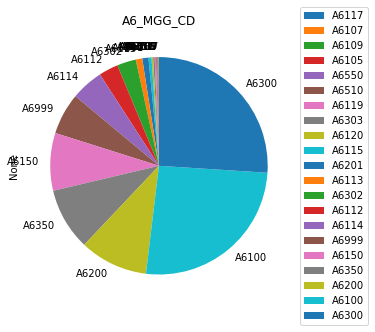

In [16]:
# 그룹코드별 담보 구성(A6)
MGG_GRP_CD_A6 = df_copy[df_copy.MGG_GRP_CD == 'A6']
A6_MGG_CD = MGG_GRP_CD_A6.groupby('MGG_CD').size().sort_values()
# A6_MGG_CD.head()

A6_MGG_CD.plot(kind='pie', figsize=(10,5), startangle=90)
plt.title('A6_MGG_CD')
plt.legend(A6_MGG_CD.index, loc='center left', bbox_to_anchor=(1,0.5))
plt.show

#### A3 담보코드 구성

<function matplotlib.pyplot.show(close=None, block=None)>

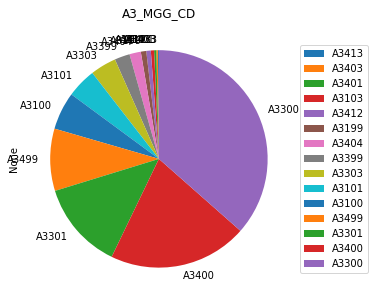

In [18]:
# 그룹코드별 담보 구성(A3)
MGG_GRP_CD_A3 = df_copy[df_copy.MGG_GRP_CD == 'A3']
A3_MGG_CD = MGG_GRP_CD_A3.groupby('MGG_CD').size().sort_values()
# A3_MGG_CD.head()
A3_MGG_CD.plot(kind='pie', figsize=(10,5),startangle=90)
plt.title('A3_MGG_CD')
plt.legend(A3_MGG_CD.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show

#### A7 담보코드 구성

<function matplotlib.pyplot.show(close=None, block=None)>

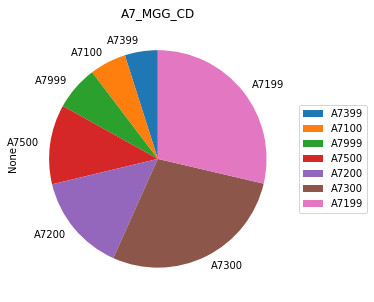

In [19]:
# 그룹코드별 담보 구성(A7)
MGG_GRP_CD_A7 = df_copy[df_copy.MGG_GRP_CD == 'A7']
A7_MGG_CD = MGG_GRP_CD_A7.groupby('MGG_CD').size().sort_values()
# A7_MGG_CD.head()
A7_MGG_CD.plot(kind='pie', figsize=(10,5),startangle=90)
plt.title('A7_MGG_CD')
plt.legend(A7_MGG_CD.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show

# 2. 납입주기코드 구성

In [77]:
# 매월납이 대부분
df_copy.groupby('CT_PY_CYCLE_CD').size()

CT_PY_CYCLE_CD
1       117
2     47690
3        74
99       44
dtype: int64

In [192]:
# 월납인 애들만 남기기

df_copy = df_copy[df_copy.CT_PY_CYCLE_CD == 2]
df_copy

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,INS_GBN_CD,INS_CT_STAT_CD,CT_ST_DT,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,INSU_DAYS,INSU_YEAR,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM
32,1712158,1,2004,2,1,19,8,1485535,9929934,31,7,2,2007-05-01,2037-05-01,120,2,5,6,10958,31,A5,A5200,2,10000
33,1712158,1,2004,2,1,19,8,1485535,9929934,31,7,2,2007-05-01,2037-05-01,120,2,5,6,10958,31,A4,A4209,1,91000
34,1712158,1,2004,2,1,19,8,1485535,9929934,31,7,2,2007-05-01,2037-05-01,120,2,5,6,10958,31,A5,A5199,1,1300
35,1712158,1,2004,2,1,19,8,1485535,9929934,31,7,2,2007-05-01,2037-05-01,120,2,5,6,10958,31,A7,A7300,1,100
36,1712158,1,2004,2,1,19,8,1485535,9929934,31,7,2,2007-05-01,2037-05-01,120,2,5,6,10958,31,A5,A5300,1,13000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407279,900230,1,1991,2,1,32,6,5961001,9892012,11,7,2,2019-12-01,2089-12-01,46,2,20,3,25568,71,A3,A3300,1,10000
407280,900230,1,1991,2,1,32,6,5961001,9892012,11,7,2,2019-12-01,2089-12-01,46,2,20,3,25568,71,A4,A4302,1,650
407281,900230,1,1991,2,1,32,6,5961001,9892012,11,7,2,2019-12-01,2089-12-01,46,2,20,3,25568,71,A5,A5200,1,13000
407282,900230,1,1991,2,1,32,6,5961001,9892012,11,7,2,2019-12-01,2089-12-01,46,2,20,3,25568,71,A4,A4101,1,13000


# 3. 납입 보험료

In [193]:
# 납입 보험료 -> 납입기간으로 나눠보기.
df_copy['CT_PY_AMT'] = (df_copy['CT_PY_AMT'] / 12 ) * 1000
price = df_copy.groupby('CT_PY_AMT').size()
price.sort_values(ascending=False)

C:\Users\SSAFY\AppData\Local\Temp/ipykernel_9408/1854978477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['CT_PY_AMT'] = (df_copy['CT_PY_AMT'] / 12 ) * 1000


CT_PY_AMT
9166.666667     1101
10000.000000    1012
2833.333333      870
2583.333333      868
3833.333333      862
                ... 
23333.333333      43
20833.333333      40
21666.666667      35
333.333333        16
416.666667        12
Length: 116, dtype: int64

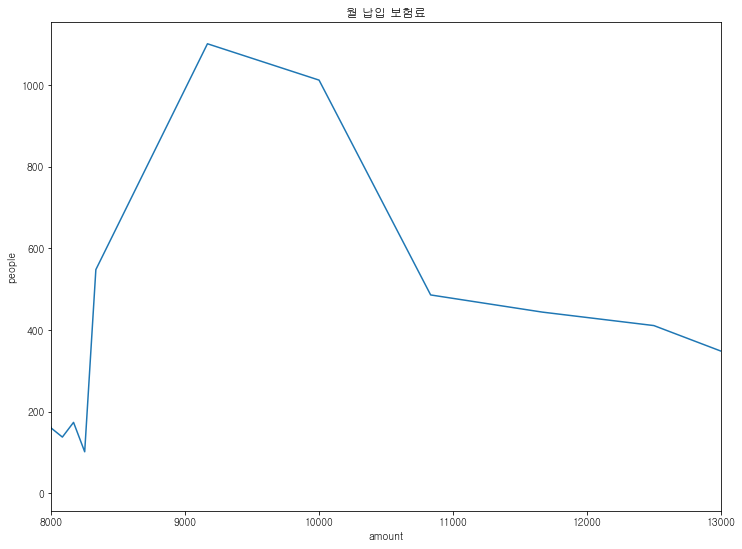

In [196]:
# 대략 월 4400~4800원이 가장 많은 비율.(25로 나누면)
# 대략 월 9100원 ~ 10000원이 가장 많은 비율 (12로 나누면)

plt.plot(price.index, price)
plt.title('월 납입 보험료')
plt.xlabel('amount')
plt.ylabel('people')
plt.xlim([8000, 13000])

plt.show()

# 4. 납입기간

In [73]:
# 20년과 30년이 비슷한 수준으로 가장 많다.

MON_CYCLE_period = df_copy.groupby('CT_PY_PD').size().sort_values(ascending=False)
MON_CYCLE_period.head()

# MON_CYCLE_period.plot(kind='pie', figsize=(10,5),startangle=90)
# plt.title('MON_CYCLE_period')
# plt.legend(MON_CYCLE_period.index, loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show

CT_PY_PD
30    14500
20    14445
10    10046
15     4241
5      1164
dtype: int64

# 5. 보장기간(종기월-시기월)

In [91]:
# 30년(30+31), 20년, 80년 순
insu_year = df_copy.groupby('INSU_YEAR').size().sort_values(ascending=False)
insu_year.head(10)

INSU_YEAR
21    5494
30    3843
31    2903
81    2875
28    2055
79    2034
25    1763
29    1439
78    1389
71    1277
dtype: int64

# 연령.성별에 따른  납입주기-보험기간-납입보험료-담보 비율 

## 연령.성별 비율

In [197]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    elif x < 80:
        return 7
    elif x < 90:
        return 8

In [198]:
df_copy["AGE_CAT"] = df_copy["AGE"].apply(category_age)
df_copy

C:\Users\SSAFY\AppData\Local\Temp/ipykernel_9408/2186306922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy["AGE_CAT"] = df_copy["AGE"].apply(category_age)


,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,INS_GBN_CD,INS_CT_STAT_CD,CT_ST_DT,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,INSU_DAYS,INSU_YEAR,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,AGE_CAT
32,1712158,1,2004,2,1,19,8,1485535,9929934,31,7,2,2007-05-01,2037-05-01,10000.000000,2,5,6,10958,31,A5,A5200,2,10000,1
33,1712158,1,2004,2,1,19,8,1485535,9929934,31,7,2,2007-05-01,2037-05-01,10000.000000,2,5,6,10958,31,A4,A4209,1,91000,1
34,1712158,1,2004,2,1,19,8,1485535,9929934,31,7,2,2007-05-01,2037-05-01,10000.000000,2,5,6,10958,31,A5,A5199,1,1300,1
35,1712158,1,2004,2,1,19,8,1485535,9929934,31,7,2,2007-05-01,2037-05-01,10000.000000,2,5,6,10958,31,A7,A7300,1,100,1
36,1712158,1,2004,2,1,19,8,1485535,9929934,31,7,2,2007-05-01,2037-05-01,10000.000000,2,5,6,10958,31,A5,A5300,1,13000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407279,900230,1,1991,2,1,32,6,5961001,9892012,11,7,2,2019-12-01,2089-12-01,3833.333333,2,20,3,25568,71,A3,A3300,1,10000,3
407280,900230,1,1991,2,1,32,6,5961001,9892012,11,7,2,2019-12-01,2089-12-01,3833.333333,2,20,3,25568,71,A4,A4302,1,650,3
407281,900230,1,1991,2,1,32,6,5961001,9892012,11,7,2,2019-12-01,2089-12-01,3833.333333,2,20,3,25568,71,A5,A5200,1,13000,3
407282,900230,1,1991,2,1,32,6,5961001,9892012,11,7,2,2019-12-01,2089-12-01,3833.333333,2,20,3,25568,71,A4,A4101,1,13000,3


In [199]:
# 연령 비율
# 당연한 이야기지만 10대가 가장 많다.
age_cat = df_copy.groupby('AGE_CAT').size()
age_cat

AGE_CAT
1    21680
2    14866
3     7107
4     2656
5     1205
6       52
7      118
8        6
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

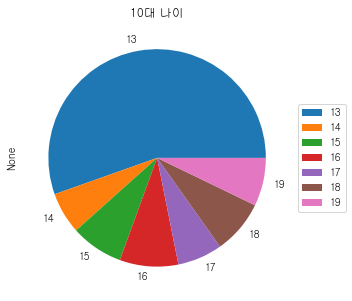

In [108]:
# 그럼 10대 중 몇 살이 가장 많을까?
teen = df_copy[df_copy.AGE_CAT == 1].groupby('AGE').size()
teen.plot(kind='pie', figsize=(10,5))
plt.title('10대 나이')
plt.legend(teen.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show

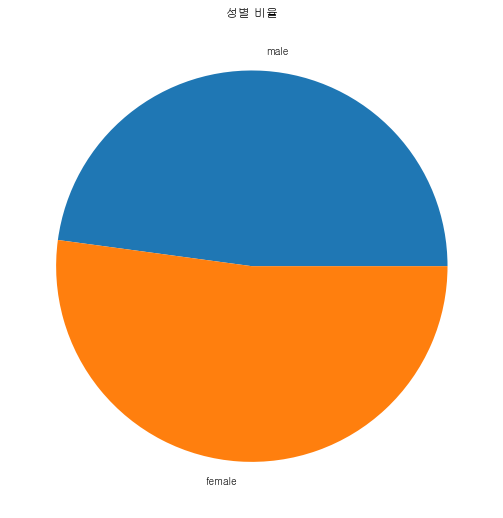

In [121]:
# 성별 비율
gender_cnt = df_copy.groupby("GENDER").count()
male = gender_cnt["JOIN_SN"][1]
female = gender_cnt["JOIN_SN"][2]
plt.title('성별 비율')
plt.pie([male, female], labels=["male", "female"])
plt.show()

### 1. 연령.성별에 따른 납입기간

In [265]:
# 10대만
df_t = df_copy[df_copy.AGE_CAT == 1]
df_t

,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,INS_GBN_CD,INS_CT_STAT_CD,CT_ST_DT,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,INSU_DAYS,INSU_YEAR,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,AGE_CAT
32,1712158,1,2004,2,1,19,8,1485535,9929934,31,7,2,2007-05-01,2037-05-01,10000.000000,2,5,6,10958,31,A5,A5200,2,10000,1
33,1712158,1,2004,2,1,19,8,1485535,9929934,31,7,2,2007-05-01,2037-05-01,10000.000000,2,5,6,10958,31,A4,A4209,1,91000,1
34,1712158,1,2004,2,1,19,8,1485535,9929934,31,7,2,2007-05-01,2037-05-01,10000.000000,2,5,6,10958,31,A5,A5199,1,1300,1
35,1712158,1,2004,2,1,19,8,1485535,9929934,31,7,2,2007-05-01,2037-05-01,10000.000000,2,5,6,10958,31,A7,A7300,1,100,1
36,1712158,1,2004,2,1,19,8,1485535,9929934,31,7,2,2007-05-01,2037-05-01,10000.000000,2,5,6,10958,31,A5,A5300,1,13000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406063,1413367,1,2010,1,1,13,3,664067,4346160,35,7,2,2015-07-01,2035-10-01,1916.666667,2,20,5,7397,21,A4,A4200,1,33000,1
406703,692552,1,2010,2,1,13,3,3564804,8432074,31,7,2,2012-07-01,2032-09-01,666.666667,2,20,1,7367,21,A6,A6300,1,100,1
406704,692552,1,2010,2,1,13,3,3564804,8432074,31,7,2,2012-07-01,2032-09-01,666.666667,2,20,1,7367,21,A6,A6100,1,100,1
406705,692552,1,2010,2,1,13,3,3564804,8432074,31,7,2,2012-07-01,2032-09-01,666.666667,2,20,1,7367,21,A4,A4200,1,24000,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CT_PY_PD', ylabel='Density'>

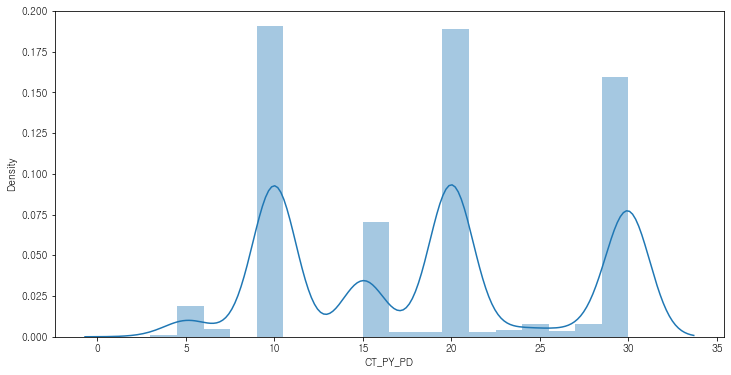

In [237]:
# 10대 남자 납입기간: 10년, 20년이 대부분. 
df_t_m = df_t[df_t.GENDER == 1]
plt.figure(figsize=(12,6))
sns.distplot(df_t_m['CT_PY_PD'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CT_PY_PD', ylabel='Density'>

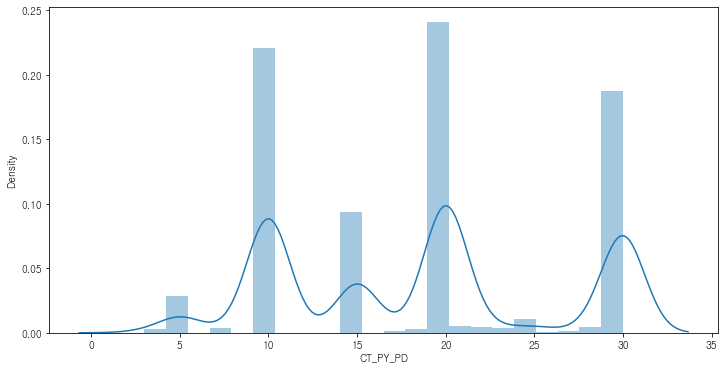

In [238]:
# 10대 여자 납입기간: 20년
df_t_f = df_t[df_t.GENDER == 2]
plt.figure(figsize=(12,6))
sns.distplot(df_t_f['CT_PY_PD'])

### 2. 연령.성별에 따른 납입보험료(박스플롯)

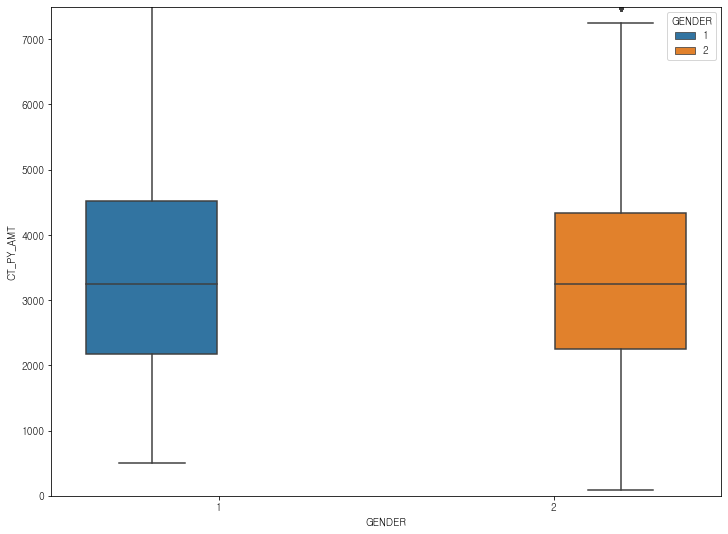

In [222]:
AGE_AMOUNT = df_t.groupby('CT_PY_AMT').count()
sns.boxplot(data=df_t,x='GENDER',y='CT_PY_AMT',hue= 'GENDER')
plt.ylim(0, 7500)
plt.show()

### 3. 연령.성별에 따른 보험기간

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 40.0)

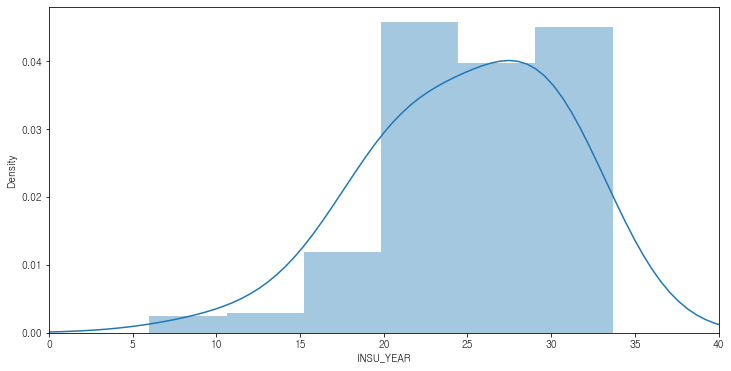

In [248]:
# 10대 남자 보헙기간: 20-30년이 대부분. 
df_t_m = df_t[df_t.GENDER == 1]
# df_t_m.groupby('INSU_YEAR').size().sort_values()
plt.figure(figsize=(12,6))
sns.distplot(df_t_m['INSU_YEAR'])
plt.xlim(0, 40)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 40.0)

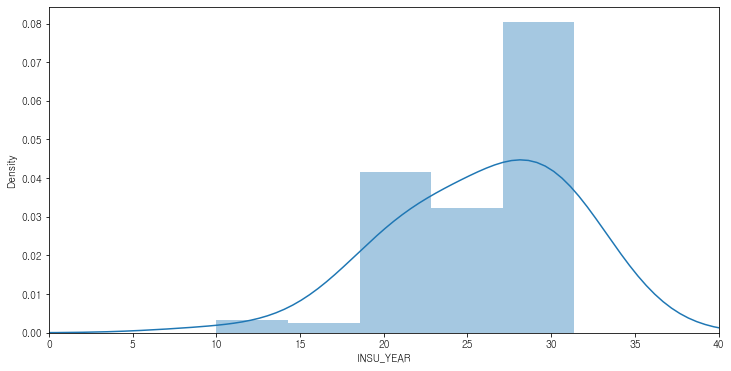

In [247]:
# 10대 여자 보험기간: 20년
df_t_f = df_t[df_t.GENDER == 2]
# df_t_f.groupby('INSU_YEAR').size().sort_values()
plt.figure(figsize=(12,6))
sns.distplot(df_t_f['INSU_YEAR'])
plt.xlim(0, 40)

### 4. 연령.성별에 따른 담보그룹

<function matplotlib.pyplot.show(close=None, block=None)>

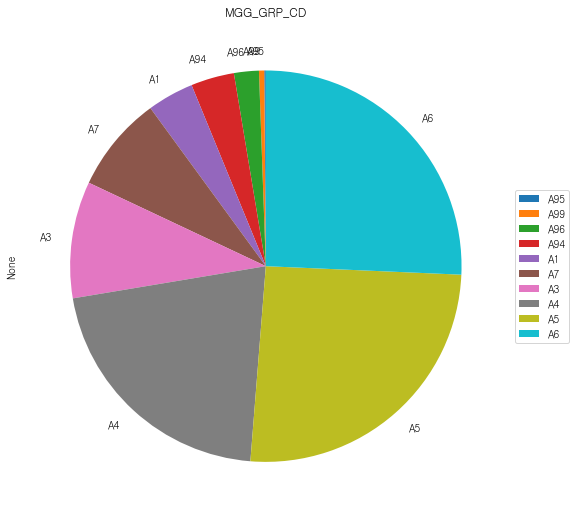

In [266]:
# 전체 그룹코드 구성
# A6:입원일당,A5:수술, A4:진단, A3:장해, A7:통원
MGG_GRP_CD = df_t.groupby('MGG_GRP_CD').size().sort_values()
MGG_GRP_CD.plot(kind='pie', figsize=(12,9), startangle=90)
plt.title('MGG_GRP_CD')
plt.legend(MGG_GRP_CD.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show

In [269]:
df_t_mgg_grp = df_t[(df_t.MGG_GRP_CD == 'A6') | (df_t.MGG_GRP_CD == 'A5') | (df_t.MGG_GRP_CD == 'A4') |(df_t.MGG_GRP_CD == 'A3') |(df_t.MGG_GRP_CD == 'A7') ]
df_t_mgg_grp['MGG_GRP_CD'] = df_t_mgg_grp['MGG_GRP_CD'].replace(['A6','A5', 'A4', 'A3', 'A7'],['입원일당','수술','진단','장해', '통원'], inplace=False)
df_t_mgg_grp

C:\Users\SSAFY\AppData\Local\Temp/ipykernel_9408/926690858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t_mgg_grp['MGG_GRP_CD'] = df_t_mgg_grp['MGG_GRP_CD'].replace(['A6','A5', 'A4', 'A3', 'A7'],['입원일당','수술','진단','장해', '통원'], inplace=False)


,JOIN_SN,JOIN_SN_TYP,BTH_YR,GENDER,IS_KRN,AGE,SCTR_CD,COM_SN,POL_SN,GIS_CD,INS_GBN_CD,INS_CT_STAT_CD,CT_ST_DT,CT_END_DT,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,CT_CHNL_CD,INSU_DAYS,INSU_YEAR,MGG_GRP_CD,MGG_CD,MGG_CNT,MGG_AMT_SUM,AGE_CAT
32,1712158,1,2004,2,1,19,8,1485535,9929934,31,7,2,2007-05-01,2037-05-01,10000.000000,2,5,6,10958,31,수술,A5200,2,10000,1
33,1712158,1,2004,2,1,19,8,1485535,9929934,31,7,2,2007-05-01,2037-05-01,10000.000000,2,5,6,10958,31,진단,A4209,1,91000,1
34,1712158,1,2004,2,1,19,8,1485535,9929934,31,7,2,2007-05-01,2037-05-01,10000.000000,2,5,6,10958,31,수술,A5199,1,1300,1
35,1712158,1,2004,2,1,19,8,1485535,9929934,31,7,2,2007-05-01,2037-05-01,10000.000000,2,5,6,10958,31,통원,A7300,1,100,1
36,1712158,1,2004,2,1,19,8,1485535,9929934,31,7,2,2007-05-01,2037-05-01,10000.000000,2,5,6,10958,31,수술,A5300,1,13000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406063,1413367,1,2010,1,1,13,3,664067,4346160,35,7,2,2015-07-01,2035-10-01,1916.666667,2,20,5,7397,21,진단,A4200,1,33000,1
406703,692552,1,2010,2,1,13,3,3564804,8432074,31,7,2,2012-07-01,2032-09-01,666.666667,2,20,1,7367,21,입원일당,A6300,1,100,1
406704,692552,1,2010,2,1,13,3,3564804,8432074,31,7,2,2012-07-01,2032-09-01,666.666667,2,20,1,7367,21,입원일당,A6100,1,100,1
406705,692552,1,2010,2,1,13,3,3564804,8432074,31,7,2,2012-07-01,2032-09-01,666.666667,2,20,1,7367,21,진단,A4200,1,24000,1


In [272]:
dfs = {}
for a in df_t_mgg_grp.MGG_GRP_CD.unique():
    dfs[a] = df_t_mgg_grp[df_t_mgg_grp["MGG_GRP_CD"] == a]

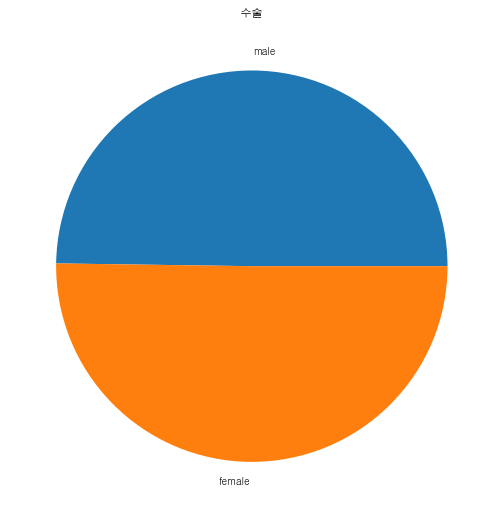

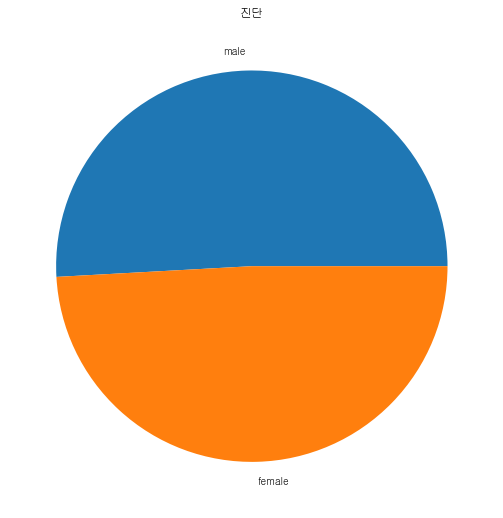

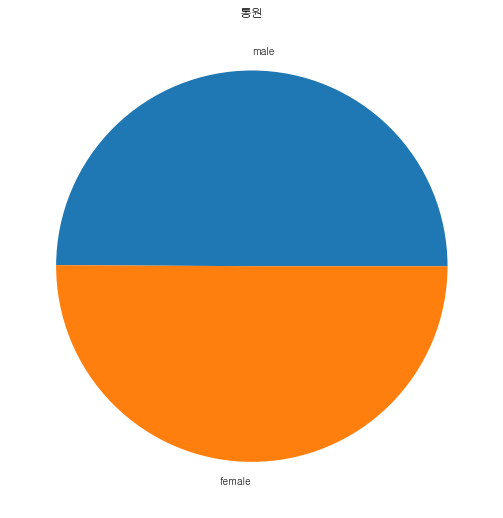

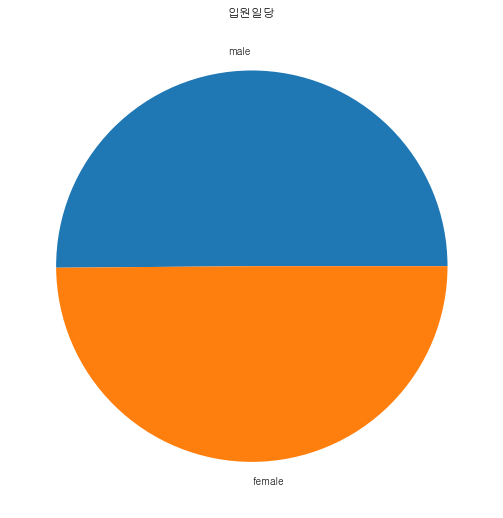

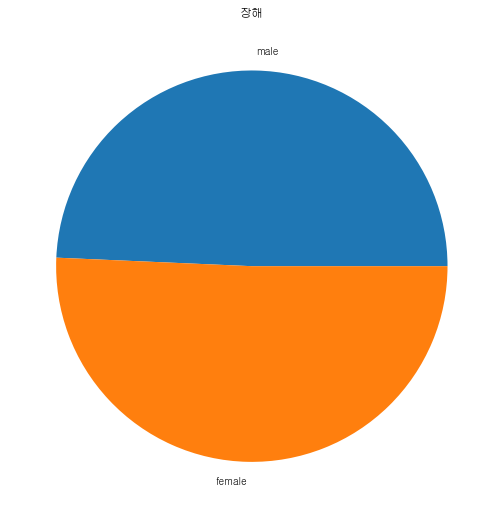

In [274]:
# 보험딤보그룹별 성별 비율
for a in df_t_mgg_grp.MGG_GRP_CD.unique():
    dft = dfs[a]
    gender_cnt = dft.groupby("GENDER").count()
    male = gender_cnt["JOIN_SN"][1]
    female = gender_cnt["JOIN_SN"][2]

    labels = ["male", "female"]

    plt.pie([male, female], labels=labels)
    plt.title(a)
    plt.show()

In [279]:
# 역으로 성별 당 보험담보그룹
# 남자 선호 보험담보그룹
male = df_t_mgg_grp[df_t_mgg_grp.GENDER == 1].groupby('MGG_GRP_CD').size().sort_values(ascending=False)
male

MGG_GRP_CD
입원일당    2792
수술      2759
진단      2328
장해      1031
통원       860
dtype: int64

In [280]:
# 역으로 성별 당 보험담보그룹
# 여자 선호 보험담보그룹
female = df_t_mgg_grp[df_t_mgg_grp.GENDER == 2].groupby('MGG_GRP_CD').size().sort_values(ascending=False)
female

MGG_GRP_CD
수술      2784
입원일당    2778
진단      2248
장해      1060
통원       863
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

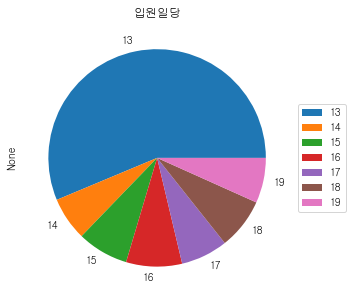

In [293]:
# 보험담보그룹 별 10대의 나이 비율
# A6 뿐 아니라 다른 담보그룹도 이런 비율이라 이건 큰 의미 없음.
dft = df_t_mgg_grp[df_t_mgg_grp.MGG_GRP_CD == '입원일당'].groupby('AGE').size()
dft.plot(kind='pie', figsize=(10,5))
plt.title('입원일당')
plt.legend(dft.index,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

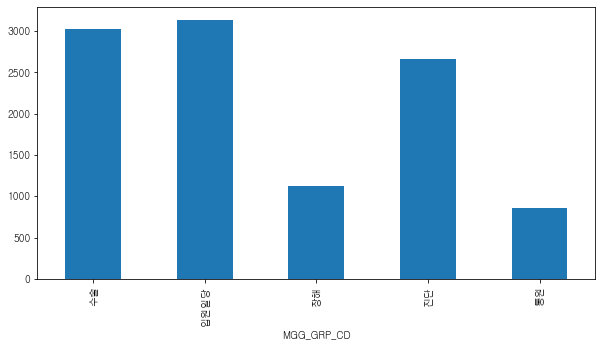

In [321]:
# 나이별 보험담보 그룹
dft = df_t_mgg_grp[df_t_mgg_grp.AGE==13].groupby(['MGG_GRP_CD']).size().sort_values()
dft = df_t_mgg_grp[df_t_mgg_grp.AGE==14].groupby(['MGG_GRP_CD']).size().sort_values()
dft = df_t_mgg_grp[df_t_mgg_grp.AGE==15].groupby(['MGG_GRP_CD']).size().sort_values()
dft = df_t_mgg_grp[df_t_mgg_grp.AGE==16].groupby(['MGG_GRP_CD']).size().sort_values()
dft = df_t_mgg_grp[df_t_mgg_grp.AGE==17].groupby(['MGG_GRP_CD']).size().sort_values()
dft = df_t_mgg_grp[df_t_mgg_grp.AGE==18].groupby(['MGG_GRP_CD']).size().sort_values()
dft = df_t_mgg_grp[df_t_mgg_grp.AGE==19].groupby(['MGG_GRP_CD']).size().sort_values()

<function matplotlib.pyplot.show(close=None, block=None)>

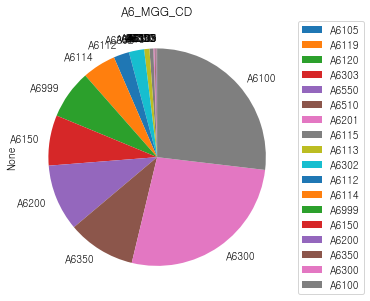

In [322]:
# 그룹코드별 담보 구성(입원일당)
MGG_GRP_CD_A6 = df_t_mgg_grp[df_t_mgg_grp.MGG_GRP_CD == '입원일당']
A6_MGG_CD = MGG_GRP_CD_A6.groupby('MGG_CD').size().sort_values()
# A6_MGG_CD.head()

A6_MGG_CD.plot(kind='pie', figsize=(10,5), startangle=90)
plt.title('A6_MGG_CD')
plt.legend(A6_MGG_CD.index, loc='center left', bbox_to_anchor=(1,0.5))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

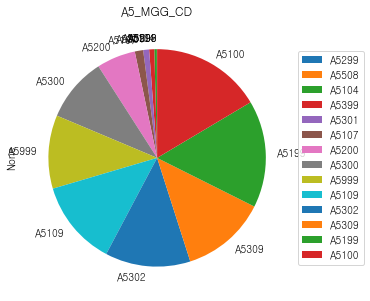

In [324]:
# 그룹코드별 담보 구성(수술)
MGG_GRP_CD_A5 = df_t_mgg_grp[df_t_mgg_grp.MGG_GRP_CD == '수술']
A5_MGG_CD = MGG_GRP_CD_A5.groupby('MGG_CD').size().sort_values()
# A5_MGG_CD.head()
A5_MGG_CD.plot(kind='pie', figsize=(10,5), startangle=90)
plt.title('A5_MGG_CD')
plt.legend(A5_MGG_CD.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

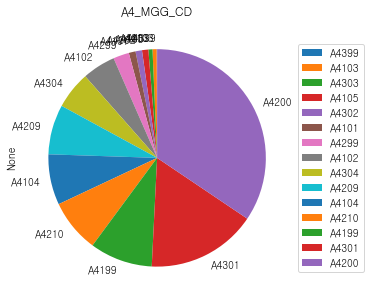

In [325]:
# 그룹코드별 담보 구성(A4)
MGG_GRP_CD_A4 = df_t_mgg_grp[df_t_mgg_grp.MGG_GRP_CD == '진단']
A4_MGG_CD = MGG_GRP_CD_A4.groupby('MGG_CD').size().sort_values()
# A4_MGG_CD.head()
A4_MGG_CD.plot(kind='pie', figsize=(10,5),startangle=90)
plt.title('A4_MGG_CD')
plt.legend(A4_MGG_CD.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

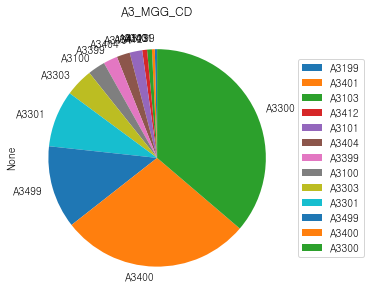

In [326]:
# 그룹코드별 담보 구성(장해)
MGG_GRP_CD_A3 = df_t_mgg_grp[df_t_mgg_grp.MGG_GRP_CD == '장해']
A3_MGG_CD = MGG_GRP_CD_A3.groupby('MGG_CD').size().sort_values()
# A3_MGG_CD.head()
A3_MGG_CD.plot(kind='pie', figsize=(10,5),startangle=90)
plt.title('A3_MGG_CD')
plt.legend(A3_MGG_CD.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

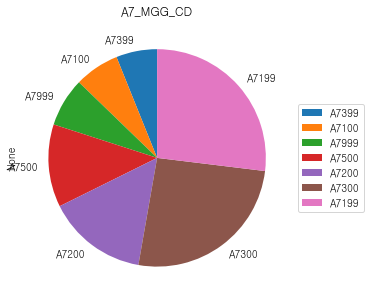

In [327]:
# 그룹코드별 담보 구성(통원)
MGG_GRP_CD_A7 = df_t_mgg_grp[df_t_mgg_grp.MGG_GRP_CD == '통원']
A7_MGG_CD = MGG_GRP_CD_A7.groupby('MGG_CD').size().sort_values()
# A7_MGG_CD.head()
A7_MGG_CD.plot(kind='pie', figsize=(10,5),startangle=90)
plt.title('A7_MGG_CD')
plt.legend(A7_MGG_CD.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show